# Introduction to deep learning for computer vision

## Introduction to convnets

**實例化一個小型convert**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**顯示model summary**

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

**利用mnist訓練convert**

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 17s 17ms/step - loss: 0.1497 - accuracy: 0.9534
Epoch 2/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0440 - accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0298 - accuracy: 0.9908
Epoch 4/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0225 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 16s 17ms/step - loss: 0.0175 - accuracy: 0.9945


**Evaluating the convnet**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0277 - accuracy: 0.9915
Test accuracy: 0.992


### The convolution operation

#### Understanding border effects and padding

#### Understanding convolution strides

### The max-pooling operation

**An incorrectly structured convnet missing its max-pooling layers**

In [ ]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 128)       73856     
                                                                 
 flatten_1 (Flatten)         (None, 61952)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

## Training a convnet from scratch on a small dataset

### The relevance of deep learning for small-data problems

### Downloading the data

**Copying images to training, validation, and test directories**

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

**Configuring the model for training**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 40s 623ms/step - loss: 0.7222 - accuracy: 0.5305 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 38s 605ms/step - loss: 0.7097 - accuracy: 0.5510 - val_loss: 0.7707 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 38s 602ms/step - loss: 0.6767 - accuracy: 0.5770 - val_loss: 0.6449 - val_accuracy: 0.6170
Epoch 4/30
63/63 [==============================] - 38s 601ms/step - loss: 0.6542 - accuracy: 0.6360 - val_loss: 0.6556 - val_accuracy: 0.5930
Epoch 5/30
63/63 [==============================] - 38s 602ms/step - loss: 0.6059 - accuracy: 0.6880 - val_loss: 0.7352 - val_accuracy: 0.6320
Epoch 6/30
63/63 [==============================] - 38s 602ms/step - loss: 0.5598 - accuracy: 0.7060 - val_loss: 0.6519 - val_accuracy: 0.6930
Epoch 7/30
63/63 [==============================] - 38s 603ms/step - loss: 0.5408 - accuracy: 0.7295 - val_loss: 0.5946 - val_accuracy: 0.6780

**Displaying curves of loss and accuracy during training**

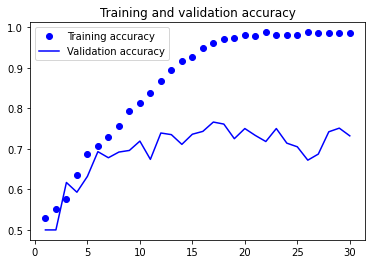

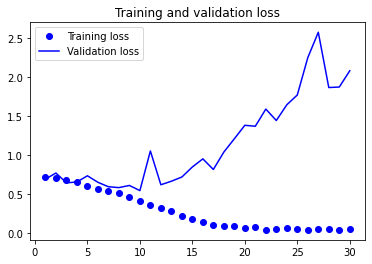

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 159ms/step - loss: 0.5655 - accuracy: 0.7215
Test accuracy: 0.721


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

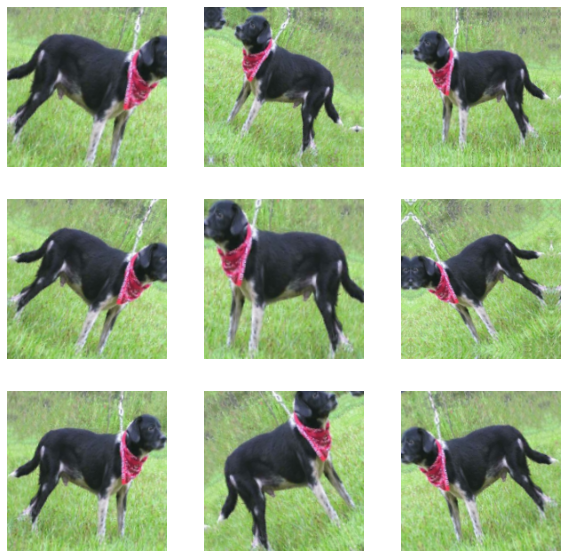

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 46s 686ms/step - loss: 0.7168 - accuracy: 0.5040 - val_loss: 0.6915 - val_accuracy: 0.5960
Epoch 2/100
63/63 [==============================] - 44s 705ms/step - loss: 0.7065 - accuracy: 0.5545 - val_loss: 0.7148 - val_accuracy: 0.5000
Epoch 3/100
63/63 [==============================] - 43s 685ms/step - loss: 0.6694 - accuracy: 0.5975 - val_loss: 0.6670 - val_accuracy: 0.5830
Epoch 4/100
63/63 [==============================] - 42s 661ms/step - loss: 0.6709 - accuracy: 0.6175 - val_loss: 0.6564 - val_accuracy: 0.6030
Epoch 5/100
63/63 [==============================] - 42s 660ms/step - loss: 0.6527 - accuracy: 0.6460 - val_loss: 0.7579 - val_accuracy: 0.6030
Epoch 6/100
63/63 [==============================] - 41s 658ms/step - loss: 0.6412 - accuracy: 0.6625 - val_loss: 1.1031 - val_accuracy: 0.5450
Epoch 7/100
63/63 [==============================] - 41s 656ms/step - loss: 0.6141 - accuracy: 0.6770 - val_loss: 0.6154 - val_accuracy:

Epoch 41/100
63/63 [==============================] - 41s 658ms/step - loss: 0.2530 - accuracy: 0.8920 - val_loss: 0.7044 - val_accuracy: 0.7810
Epoch 42/100
63/63 [==============================] - 41s 656ms/step - loss: 0.2385 - accuracy: 0.8985 - val_loss: 0.7671 - val_accuracy: 0.7930
Epoch 43/100
63/63 [==============================] - 41s 657ms/step - loss: 0.2410 - accuracy: 0.9075 - val_loss: 0.5939 - val_accuracy: 0.8010
Epoch 44/100
63/63 [==============================] - 41s 656ms/step - loss: 0.2164 - accuracy: 0.9185 - val_loss: 0.6987 - val_accuracy: 0.7920
Epoch 45/100
63/63 [==============================] - 42s 661ms/step - loss: 0.2391 - accuracy: 0.9005 - val_loss: 0.6425 - val_accuracy: 0.7760
Epoch 46/100
63/63 [==============================] - 41s 656ms/step - loss: 0.2188 - accuracy: 0.9160 - val_loss: 0.6978 - val_accuracy: 0.7840
Epoch 47/100
63/63 [==============================] - 42s 662ms/step - loss: 0.1853 - accuracy: 0.9230 - val_loss: 0.7784 - val_ac

63/63 [==============================] - 41s 657ms/step - loss: 0.1099 - accuracy: 0.9585 - val_loss: 1.5920 - val_accuracy: 0.8000
Epoch 98/100
63/63 [==============================] - 41s 655ms/step - loss: 0.1848 - accuracy: 0.9480 - val_loss: 1.0189 - val_accuracy: 0.7840
Epoch 99/100
63/63 [==============================] - 41s 656ms/step - loss: 0.1262 - accuracy: 0.9595 - val_loss: 1.2827 - val_accuracy: 0.7880
Epoch 100/100
63/63 [==============================] - 41s 656ms/step - loss: 0.1427 - accuracy: 0.9515 - val_loss: 1.1730 - val_accuracy: 0.7910


**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 10s 153ms/step - loss: 0.4949 - accuracy: 0.7850
Test accuracy: 0.785


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 1s 927ms/step


In [ ]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 2s 27ms/step - loss: 16.1979 - accuracy: 0.9215 - val_loss: 3.6484 - val_accuracy: 0.9740
Epoch 2/20
63/63 [==============================] - 2s 25ms/step - loss: 4.2520 - accuracy: 0.9735 - val_loss: 5.1825 - val_accuracy: 0.9670
Epoch 3/20
63/63 [==============================] - 2s 25ms/step - loss: 1.7462 - accuracy: 0.9875 - val_loss: 3.4656 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 2s 25ms/step - loss: 1.8928 - accuracy: 0.9855 - val_loss: 4.5955 - val_accuracy: 0.9740
Epoch 5/20
63/63 [==============================] - 2s 25ms/step - loss: 0.9854 - accuracy: 0.9915 - val_loss: 3.7786 - val_accuracy: 0.9740
Epoch 6/20
63/63 [==============================] - 2s 25ms/step - loss: 1.1424 - accuracy: 0.9935 - val_loss: 4.4942 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 2s 25ms/step - loss: 0.0262 - accuracy: 0.9990 - val_loss: 4.8919 - val_accuracy: 0.9710
Epoch 8/20
6

**Plotting the results**

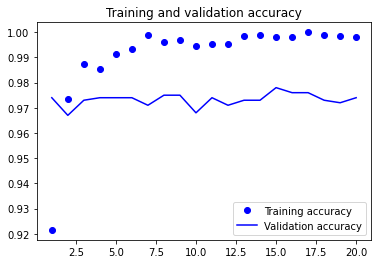

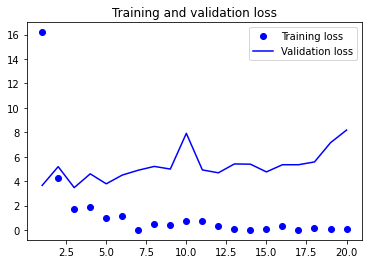

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [ ]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 191s 3s/step - loss: 22.1925 - accuracy: 0.8915 - val_loss: 5.9256 - val_accuracy: 0.9640
Epoch 2/50
63/63 [==============================] - 209s 3s/step - loss: 6.8708 - accuracy: 0.9520 - val_loss: 3.7746 - val_accuracy: 0.9740
Epoch 3/50
63/63 [==============================] - 210s 3s/step - loss: 4.5006 - accuracy: 0.9675 - val_loss: 7.4445 - val_accuracy: 0.9580
Epoch 4/50
63/63 [==============================] - 216s 3s/step - loss: 4.9662 - accuracy: 0.9650 - val_loss: 6.4088 - val_accuracy: 0.9630
Epoch 5/50
63/63 [==============================] - 225s 4s/step - loss: 3.5678 - accuracy: 0.9675 - val_loss: 4.2627 - val_accuracy: 0.9770
Epoch 6/50
63/63 [==============================] - 221s 4s/step - loss: 3.5839 - accuracy: 0.9685 - val_loss: 4.2560 - val_accuracy: 0.9800
Epoch 7/50
63/63 [==============================] - 220s 4s/step - loss: 3.6419 - accuracy: 0.9725 - val_loss: 4.9594 - val_accuracy: 0.9710
Epoch 8/50
6

63/63 [==============================] - 219s 3s/step - loss: 0.2857 - accuracy: 0.9940 - val_loss: 2.7501 - val_accuracy: 0.9790
Epoch 42/50
63/63 [==============================] - 219s 3s/step - loss: 0.3809 - accuracy: 0.9940 - val_loss: 2.5474 - val_accuracy: 0.9800
Epoch 43/50
63/63 [==============================] - 219s 3s/step - loss: 0.6420 - accuracy: 0.9905 - val_loss: 2.6730 - val_accuracy: 0.9760
Epoch 44/50
63/63 [==============================] - 218s 3s/step - loss: 0.2722 - accuracy: 0.9950 - val_loss: 3.2102 - val_accuracy: 0.9750
Epoch 45/50
63/63 [==============================] - 219s 4s/step - loss: 0.3364 - accuracy: 0.9940 - val_loss: 2.9194 - val_accuracy: 0.9800
Epoch 46/50
63/63 [==============================] - 219s 3s/step - loss: 0.1798 - accuracy: 0.9960 - val_loss: 3.4912 - val_accuracy: 0.9800
Epoch 47/50
63/63 [==============================] - 219s 3s/step - loss: 0.3511 - accuracy: 0.9940 - val_loss: 2.9919 - val_accuracy: 0.9800
Epoch 48/50
63/63 

**Evaluating the model on the test set**

In [ ]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 139s 2s/step - loss: 4.7601 - accuracy: 0.9800
Test accuracy: 0.980


### Fine-tuning a pretrained model

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 209s 3s/step - loss: 3.1241 - accuracy: 0.9720 - val_loss: 2.2752 - val_accuracy: 0.9800
Epoch 2/30
63/63 [==============================] - 200s 3s/step - loss: 2.6332 - accuracy: 0.9740 - val_loss: 2.1894 - val_accuracy: 0.9770
Epoch 3/30
63/63 [==============================] - 200s 3s/step - loss: 1.7887 - accuracy: 0.9750 - val_loss: 2.3209 - val_accuracy: 0.9770
Epoch 4/30
63/63 [==============================] - 200s 3s/step - loss: 1.2598 - accuracy: 0.9825 - val_loss: 2.1007 - val_accuracy: 0.9790
Epoch 5/30
63/63 [==============================] - 200s 3s/step - loss: 0.6951 - accuracy: 0.9875 - val_loss: 1.6292 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 207s 3s/step - loss: 0.5850 - accuracy: 0.9870 - val_loss: 2.2560 - val_accuracy: 0.9810
Epoch 7/30
63/63 [==============================] - 201s 3s/step - loss: 0.4791 - accuracy: 0.9875 - val_loss: 1.9096 - val_accuracy: 0.9830
Epoch 8/30
63

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 117s 2s/step - loss: 2.1380 - accuracy: 0.9790
Test accuracy: 0.979


## Summary